<a href="https://colab.research.google.com/github/Priyo-prog/Time-series-analysis/blob/main/The%20ARCH%20Model/the_arch_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The ARCH Model**

The Auto-Regressive Conditional Heteroskedasticity model explains the suddens shocks in the time-series.

## Important Libraries and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA # new special package for ARIMA models
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the Data

In [2]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load the dataset
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Data Science/Time Series/Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


## Preprocess the Data

In [4]:
## transforming the dataset
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') # business days as frequency
df_comp = df_comp.fillna(method='ffill')

In [5]:
df_comp['market_value'] = df_comp.ftse

## Splitting the Training and Testing Set

In [6]:
## Getting the 80% of data as training set
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The Log-Likelihood Test

In [7]:
def llr_test(mod_1, mod_2, DF=1):
   """ mod_1, mod_2= models to compare, df=degrees of freedom"""
   L1 = mod_1.fit(trend='nc').llf ## Add trend='ct'
   L2 = mod_2.fit(trend='nc').llf ## log likelihood
   LR = (2*(L2-L1)) ## test statistics
   p = chi2.sf(LR, DF).round(3) ## p-value
   return p

## Creating Returns

In [8]:
df['returns'] = df.market_value.pct_change(1).mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Creating Squared Returns

In [9]:
df['sq_returns'] = df.returns.mul(df.returns)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Returns vs Squared Returns

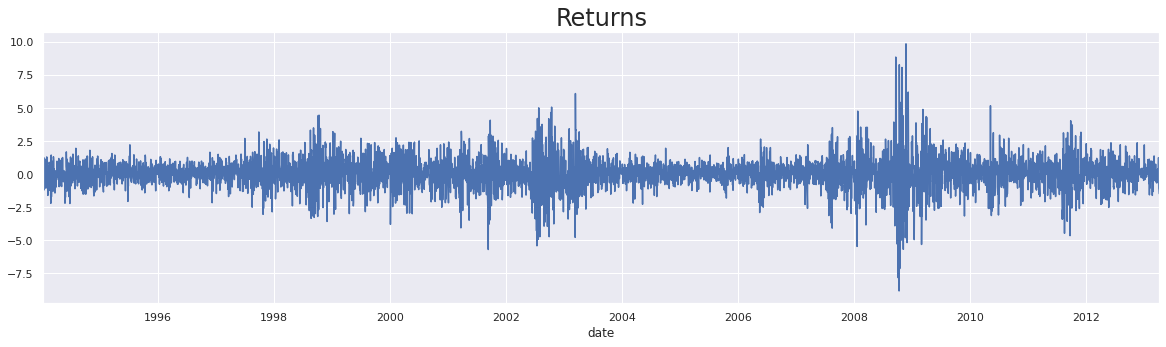

In [10]:
df.returns.plot(figsize=(20,5))
plt.title("Returns", size=24)
plt.show()

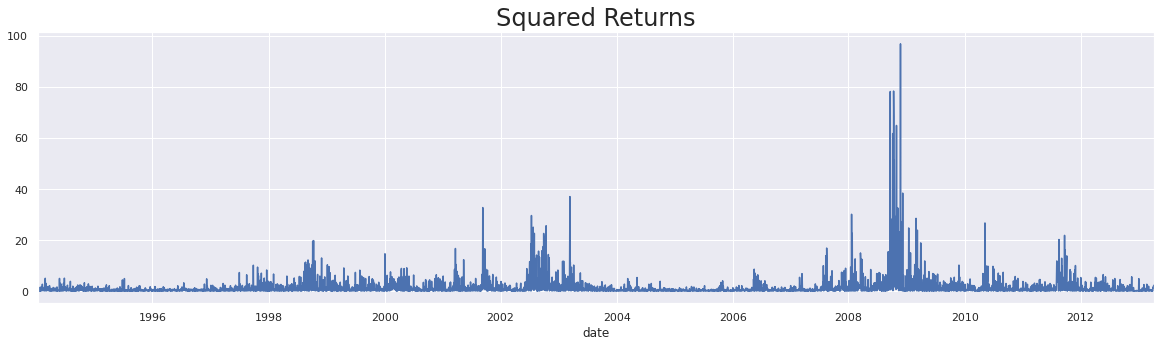

In [11]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Squared Returns", size=24)
plt.show()

## The PACF of Returns and Squared Returns

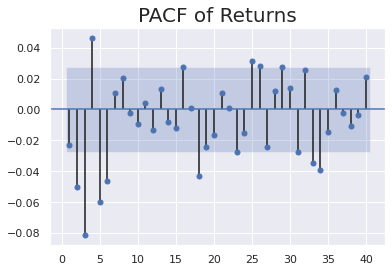

In [12]:
sgt.plot_pacf(df.returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Returns", size=20)
plt.show()

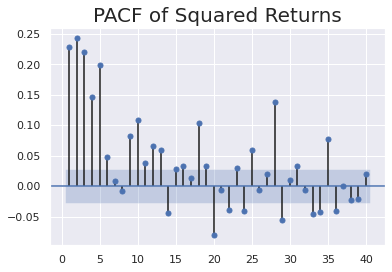

In [13]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Squared Returns", size=20)
plt.show()

## The arch_model() Method

In [14]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 30.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [15]:
from arch import arch_model

In [16]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
print(results_arch_1.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6579303469.390623
Iteration:      2,   Func. Count:     15,   Neg. LLF: 2701100877.2298183
Iteration:      3,   Func. Count:     23,   Neg. LLF: 7009.030632045198
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7024.035835212278
Iteration:      5,   Func. Count:     35,   Neg. LLF: 7010.712887007633
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6975.418108744094
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7092.271338807877
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6973.879266228052
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6970.088048943886
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6970.058478413694
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6970.0583674757745
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6970.058366189882
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6970.058366189167
Optimization terminated successfully    (Exit mode 0)
        

**Mean Model:** - Mean Model is Constant Mean, this implies that the mean is constant ratehr than moving.

**Vol Model:** - It is **GARCH** which uses different equation for variance.

**Df Model:**- Degrees of Freedom. The number of coefficients we are trying to estimate.

**mu** - Single constant coefficient to be determined. Large **t** value suggests significance of the coefficient.


#####**Volatility Model:**

**omega** - The cosntant value in variance.
**alpha[1]** - Coefficients for the squared values.

**The iteration part**

1) Several iterations before it converges.

2) Fitting 2 equations at the same time.

3) Fits the model with certain coefficients, checks how well it has performed and adjusts the coefficients.

Generally the iterations stops when log-likelihood decreases.

## The Simple ARCH(1)

The mean of the series is not serially correlated.

The mean equation is time invariant so it neither includes pasrt values or past residuals. mean = 'Constant'

Setting the volatility model equal to ARCH. **vol='ARCH'**

Specify the order of the model **p=1**

In [18]:
model_arch_1 = arch_model(df.returns[1:], mean='Constant', vol='ARCH', p=1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782040875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Thu, Aug 04 2022   Df Residuals:                     5019
Time:                        02:30:17   Df Model:                            1
          

In [19]:
model_arch_1 = arch_model(df.returns[1:], mean='AR', lags = [2,3,6], vol='ARCH', p=1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     30,   Neg. LLF: 7660.088782040875
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7660.088782040875
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                           AR - ARCH Model Results                            
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                        AR   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Thu, Aug 04 2022   Df Residuals:                     5019
Time:                        02:56:17   Df Model:                            1
          

In [21]:
model_arch_1 = arch_model(df.returns[1:], mean='AR', lags = [2,3,6], vol='ARCH', p=1, dist='t')
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     54,   Neg. LLF: 99270.99753250643
Iteration:     10,   Func. Count:    101,   Neg. LLF: 7329.094538493613
Iteration:     15,   Func. Count:    141,   Neg. LLF: 7327.763601273473
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7327.763601273473
            Iterations: 16
            Function evaluations: 148
            Gradient evaluations: 16
                              AR - ARCH Model Results                               
Dep. Variable:                      returns   R-squared:                       0.007
Mean Model:                              AR   Adj. R-squared:                  0.007
Vol Model:                             ARCH   Log-Likelihood:               -7327.76
Distribution:      Standardized Student's t   AIC:                           14669.5
Method:                  Maximum Likelihood   BIC:                           14715.2
                                              No. Observations: 

## Higher-Lag ARCH Models

In [23]:
model_arch_2 = arch_model(df.returns[1:], mean='Constant', vol='ARCH', p=2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
print(results_arch_2.summary())

Iteration:      5,   Func. Count:     37,   Neg. LLF: 8810.02930517937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7449.545164098316
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Thu, Aug 04 2022   Df Residuals:                     5019
Time:                        03:05:50   Df Model:                            1
           

This is an trial and error process. We have tried 13th model in this case to find the p-value not significant.